### James Griffin 
#### CS 501R
#### 22 Feb 2021
#### Girvan Newman Algorithm 

##### Lab specs 
Apply the Givan-Newman method for finding different components to the following graphs:

* A graph with 40 nodes constructed using the Barabasi-Albert method
* A graph with 40 nodes constructed using the Watts-Strogatz method
* A graph with 40 nodes constructed using the Erdos-Renyi method

Two graphs of your choosing from this repository. Choose smaller graphs
What differences did you observe about the way the different graph types affected how much clustering existed between vertices? What did you learn about the Givan-Newman method? How would you apply this method to preventing COVID-19 spread? 

Close

In [1]:
#importing 
import pandas as pd
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
#graphs as specified from the lab specs 
ba = nx.barabasi_albert_graph(40,2)
ws = nx.watts_strogatz_graph(40, 4, .7)
er = nx.erdos_renyi_graph(40, .7)

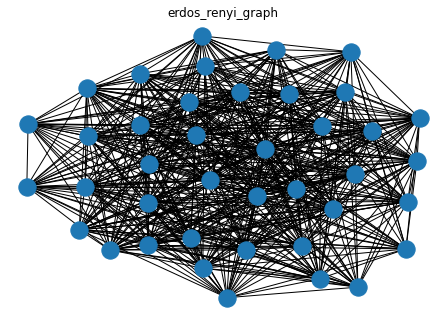

In [3]:
#visualize
nx.draw(er)
plt.title('erdos_renyi_graph')
plt.show()

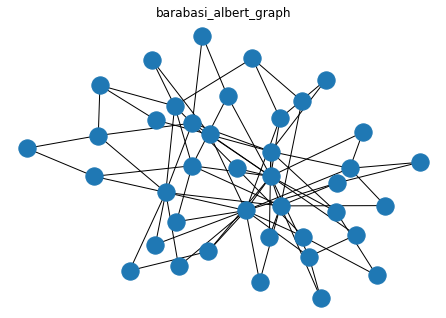

In [8]:
#visualize
nx.draw(ba)
plt.title('barabasi_albert_graph')
plt.show()

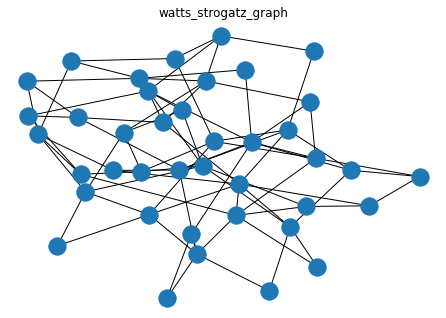

In [12]:
#visualize
nx.draw(ws)
plt.title('watts_strogatz_graph')
plt.show()

So the most complicated graph by a country mile is erdos_renyi_graph, so when concucting the Girvan Newman it will likely take the longest to divide into different communities than the other graphs, that are relitively simpler

In [13]:
def edge_to_remove(G):
    '''to know what edge to remove,  we must first calculate the edge betweeness 
    values ''' 
    #this returns a dictionary of  the betweeness values 
    dict1 = nx.edge_betweenness_centrality(G)
    #with edges as the  keys and the values as the value of betweeness between the  edges 
    
    list_of_tuples = list(dict1.items())
    #first element of this list will be the  edge o f each tuple and the  
    #second  element of each tuple is going to be the edge betweeness value 

    #now we want to sort on the edge betweeness value, so we can cut them in order 
    list_of_tuples = sorted(list_of_tuples, key = lambda x:x[1], reverse = True)
    #sorting the list of tuples basec on the edge betweeness, hence x[1]

    #return (a,b) where a is the source and b is the target
    return list_of_tuples[0][0]

def girvan(G):
    '''function to perform the  Girvan  Newman Algorithm 
    '''
    #first check to see if  the graph is connected 
    a = nx.connected_components(G)
    lena = len(list(a))
    print('# of connected components are ', lena)
    while (lena == 1): 
    #need  to remove edges based on the value of their betweeness 
        G.remove_edge(*edge_to_remove(G)) #this  will be (a,b)\

        a = nx.connected_components(G)
        lena = len(list(a))
        print('# of connected components are ', lena)

    return a


In [14]:
print("Erdos-Renyi method")
a = girvan(er)



Erdos-Renyi method
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  2


In [15]:
girvan(ba)

# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  2


<generator object connected_components at 0x7f674187c550>

In [16]:
girvan(ws)

# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  1
# of connected components are  2


<generator object connected_components at 0x7f67417fab50>

Yeah so it was as we thought, the erdos_renyi_graph was the most complex and took 22 cuts to get to two communities. The next longest was the watts strogatz which took 16 cuts, and the simplest graph, the barabasi_albert_graph took 12 cuts. 